In [ ]:
from google.colab import files

# Vai abrir a janela para selecionar os arquivos CSV do seu computador
uploaded = files.upload()


Saving Escolaridade.csv.xlsx to Escolaridade.csv.xlsx
Saving Populacao.csv.xlsx to Populacao.csv.xlsx
Saving Renda.csv.xlsx to Renda.csv.xlsx


In [ ]:
from google.colab import files

# Vai abrir a janela para selecionar os arquivos CSV do seu computador
uploaded = files.upload()


Saving PixTransacoesPorRegiao.csv.csv to PixTransacoesPorRegiao.csv (1).csv
Saving PixUsuariosFizeramPix.csv.csv to PixUsuariosFizeramPix.csv (1).csv
Saving TransacoesPorIdade.csv.csv to TransacoesPorIdade.csv (1).csv


In [ ]:
from google.colab import files

# Vai abrir a janela para você selecionar os arquivos no seu computador
uploaded = files.upload()


Saving PixTransacoesPorRegiao.csv.csv to PixTransacoesPorRegiao.csv (2).csv
Saving PixUsuariosFizeramPix.csv.csv to PixUsuariosFizeramPix.csv (2).csv
Saving TransacoesPorIdade.csv.csv to TransacoesPorIdade.csv (2).csv


In [ ]:
from google.colab import files

# Vai abrir a janela para você selecionar os arquivos no seu computador
uploaded = files.upload()


Saving Escolaridade.csv.xlsx to Escolaridade.csv (1).xlsx
Saving Populacao.csv.xlsx to Populacao.csv (1).xlsx
Saving Renda.csv.xlsx to Renda.csv (1).xlsx


In [ ]:
import pandas as pd

# CSVs do Bacen
df_idade = pd.read_csv("TransacoesPorIdade.csv (2).csv", sep=';', encoding='latin1')
df_regiao = pd.read_csv("PixTransacoesPorRegiao.csv (2).csv", sep=';', encoding='latin1')
df_usuarios = pd.read_csv("PixUsuariosFizeramPix.csv (2).csv", sep=';', encoding='latin1')

# Excel do IBGE
df_pop = pd.read_excel("Populacao.csv (1).xlsx")
df_esc = pd.read_excel("Escolaridade.csv (1).xlsx")
df_renda = pd.read_excel("Renda.csv (1).xlsx")


In [ ]:
# Converter para float primeiro
df_idade['qtd_transacoes'] = df_idade['qtd_transacoes'].str.replace('.', '', regex=False)  # remove pontos de milhar
df_idade['qtd_transacoes'] = df_idade['qtd_transacoes'].str.replace(',', '.', regex=False)  # substitui vírgula por ponto
df_idade['qtd_transacoes'] = df_idade['qtd_transacoes'].astype(float)


In [ ]:
df_idade['qtd_transacoes'] = df_idade['qtd_transacoes'].round(0).astype(int)


In [ ]:
df_idade['perc_transacoes'] = df_idade['perc_transacoes'].str.replace(',', '.', regex=False).astype(float)


In [ ]:
import pandas as pd

# =========================
# 1️⃣ Ler arquivos
# =========================

# Bacen (CSV)
df_idade = pd.read_csv("TransacoesPorIdade.csv (2).csv", sep=';', encoding='latin1')
df_regiao = pd.read_csv("PixTransacoesPorRegiao.csv (2).csv", sep=';', encoding='latin1')
df_usuarios = pd.read_csv("PixUsuariosFizeramPix.csv (2).csv", sep=';', encoding='latin1')

# IBGE (Excel)
df_pop = pd.read_excel("Populacao.csv (1).xlsx")
df_esc = pd.read_excel("Escolaridade.csv (1).xlsx")
df_renda = pd.read_excel("Renda.csv (1).xlsx")

# =========================
# 2️⃣ Limpeza e padronização de números
# =========================

def limpar_numeros(coluna):
    # Remove pontos de milhar e substitui vírgula por ponto
    coluna = coluna.astype(str).str.replace('.', '', regex=False)
    coluna = coluna.str.replace(',', '.', regex=False)
    return coluna.astype(float)

# Colunas numéricas do Bacen
df_idade['qtd_transacoes'] = limpar_numeros(df_idade.iloc[:,1])
df_idade['perc_transacoes'] = limpar_numeros(df_idade.iloc[:,2])

df_regiao['qtd_transacoes'] = limpar_numeros(df_regiao.iloc[:,1])
df_usuarios['qtd_usuarios'] = limpar_numeros(df_usuarios.iloc[:,1])

# =========================
# 3️⃣ Renomear colunas principais
# =========================

df_idade = df_idade.rename(columns={df_idade.columns[0]: 'faixa_idade'})
df_regiao = df_regiao.rename(columns={df_regiao.columns[0]: 'regiao'})
df_usuarios = df_usuarios.rename(columns={df_usuarios.columns[0]: 'faixa_idade'})

# =========================
# 4️⃣ Consolidar dados (exemplo simplificado)
# =========================

# Merge df_idade com df_usuarios (por faixa etária)
df_final = pd.merge(df_idade, df_usuarios[['faixa_idade','qtd_usuarios']], on='faixa_idade', how='left')

# Merge com df_regiao (exemplo simplificado: não há coluna comum, apenas adicionando volume por região)
# Ajuste conforme colunas reais do seu CSV
df_final_regiao = df_regiao[['regiao','qtd_transacoes']]
df_final = pd.concat([df_final, df_final_regiao], axis=1)

# Merge com IBGE (população, escolaridade e renda)
# Ajuste conforme colunas reais dos arquivos Excel
# Exemplo: criar coluna "municipio" em df_final para merge se houver
# df_final = df_final.merge(df_pop, on='municipio', how='left')
# df_final = df_final.merge(df_esc, on='municipio', how='left')
# df_final = df_final.merge(df_renda, on='municipio', how='left')

# =========================
# 5️⃣ Exportar CSV consolidado
# =========================

df_final.to_csv("dados_consolidados.csv", index=False, encoding='utf-8')
print("✅ CSV consolidado gerado com sucesso!")


✅ CSV consolidado gerado com sucesso!


In [ ]:
# Filtrar linhas que têm número na segunda coluna
df_pop = pd.read_excel("Populacao.csv (1).xlsx")
df_pop = df_pop[pd.to_numeric(df_pop.iloc[:,1], errors='coerce').notnull()]
df_pop = df_pop.iloc[:, [0,1]]  # manter apenas colunas relevantes
df_pop = df_pop.rename(columns={df_pop.columns[0]: 'municipio', df_pop.columns[1]: 'populacao'})
df_pop['populacao'] = limpar_numeros(df_pop['populacao'])

df_esc = pd.read_excel("Escolaridade.csv (1).xlsx")
df_esc = df_esc[pd.to_numeric(df_esc.iloc[:,1], errors='coerce').notnull()]
df_esc = df_esc.iloc[:, [0,1]]
df_esc = df_esc.rename(columns={df_esc.columns[0]: 'municipio', df_esc.columns[1]: 'percentual_alfabetizado'})
df_esc['percentual_alfabetizado'] = limpar_numeros(df_esc['percentual_alfabetizado'])

df_renda = pd.read_excel("Renda.csv (1).xlsx")
df_renda = df_renda[pd.to_numeric(df_renda.iloc[:,1], errors='coerce').notnull()]
df_renda = df_renda.iloc[:, [0,1]]
df_renda = df_renda.rename(columns={df_renda.columns[0]: 'municipio', df_renda.columns[1]: 'renda_media'})
df_renda['renda_media'] = limpar_numeros(df_renda['renda_media'])


In [ ]:
print(df_idade.columns)
print(df_regiao.columns)
print(df_usuarios.columns)


Index(['faixa_idade', 'mais de 60 anos', 'atÃ© 19 anos', 'entre 50 e 59 anos',
       'entre 40 e 49 anos', 'entre 20 e 29 anos', 'entre 30 e 39 anos',
       'qtd_transacoes', 'perc_transacoes'],
      dtype='object')
Index(['regiao', 'Centro-Oeste', 'Norte', 'Sul', 'Nordeste', 'Sudeste',
       'qtd_transacoes'],
      dtype='object')
Index(['faixa_idade', 'Recebedor PJ', 'Recebedor PF', 'Pagador PJ',
       'Pagador PF', 'UsuÃ¡rios PF', 'UsuÃ¡rios PJ', 'qtd_usuarios'],
      dtype='object')


In [ ]:
# Renomear para evitar conflito
df_idade = df_idade.rename(columns={'qtd_transacoes': 'qtd_transacoes_idade',
                                    'perc_transacoes': 'perc_transacoes_idade'})

df_regiao = df_regiao.rename(columns={'qtd_transacoes': 'qtd_transacoes_regiao'})

df_usuarios = df_usuarios.rename(columns={'qtd_usuarios': 'qtd_usuarios_idade'})


In [ ]:
# Merge idade + usuários
df_bacen = pd.merge(df_idade, df_usuarios[['faixa_idade','qtd_usuarios_idade']], on='faixa_idade', how='left')

# Merge com regiões (usando left_index ou ajustar conforme necessário)
df_bacen = pd.concat([df_bacen, df_regiao[['regiao','qtd_transacoes_regiao']]], axis=1)


In [ ]:
print(df_idade.columns)
print(df_regiao.columns)
print(df_usuarios.columns)


Index(['ï»¿"DateTime"', 'mais de 60 anos', 'atÃ© 19 anos',
       'entre 50 e 59 anos', 'entre 40 e 49 anos', 'entre 20 e 29 anos',
       'entre 30 e 39 anos'],
      dtype='object')
Index(['ï»¿"DateTime"', 'Centro-Oeste', 'Norte', 'Sul', 'Nordeste', 'Sudeste'], dtype='object')
Index(['ï»¿"DateTime"', 'Recebedor PJ', 'Recebedor PF', 'Pagador PJ',
       'Pagador PF', 'UsuÃ¡rios PF', 'UsuÃ¡rios PJ'],
      dtype='object')


In [ ]:
print(df_final.columns)


Index(['faixa_idade', 'mais de 60 anos', 'atÃ© 19 anos', 'entre 50 e 59 anos',
       'entre 40 e 49 anos', 'entre 20 e 29 anos', 'entre 30 e 39 anos',
       'qtd_transacoes_x', 'perc_transacoes', 'qtd_usuarios', 'regiao',
       'qtd_transacoes_y', 'municipio', 'populacao', 'percentual_alfabetizado',
       'renda_media'],
      dtype='object')


In [ ]:
df_final = df_final.rename(columns={
    'qtd_transacoes_x': 'qtd_transacoes_idade',
    'qtd_transacoes_y': 'qtd_transacoes_regiao',
    'qtd_usuarios': 'qtd_usuarios_idade'
})


In [ ]:
df_final['transacoes_por_populacao'] = df_final['qtd_transacoes_idade'] / df_final['populacao'] * 100


In [ ]:
print(df_final[['faixa_idade', 'populacao', 'qtd_transacoes_idade', 'transacoes_por_populacao']].head())


  faixa_idade  populacao  qtd_transacoes_idade  transacoes_por_populacao
0  2023-09-30        NaN              0.049590                       NaN
1  2023-10-31        NaN              0.043097                       NaN
2  2023-11-30        NaN              0.042492                       NaN
3  2023-12-31        NaN              0.048172                       NaN
4  2024-01-31        NaN              0.049294                       NaN


In [ ]:
# Criar indicador de vulnerabilidade só com idade
df_final['alfabetizacao_normalizada'] = 0  # ignorando IBGE
df_final['renda_normalizada'] = 0          # ignorando IBGE
df_final['vulnerabilidade'] = df_final['transacoes_por_populacao']  # só idade


In [ ]:
print(df_final.columns)


Index(['faixa_idade', 'mais de 60 anos', 'atÃ© 19 anos', 'entre 50 e 59 anos',
       'entre 40 e 49 anos', 'entre 20 e 29 anos', 'entre 30 e 39 anos',
       'qtd_transacoes_idade', 'perc_transacoes', 'qtd_usuarios_idade',
       'regiao', 'qtd_transacoes_regiao', 'municipio', 'populacao',
       'percentual_alfabetizado', 'renda_media', 'transacoes_por_populacao',
       'alfabetizacao_normalizada', 'renda_normalizada', 'vulnerabilidade'],
      dtype='object')


In [ ]:
# Visualizar as primeiras linhas
print(df_final[['faixa_idade', 'populacao', 'qtd_transacoes_idade', 'transacoes_por_populacao', 'vulnerabilidade']].head())

  faixa_idade  populacao  qtd_transacoes_idade  transacoes_por_populacao  \
0  2023-09-30        NaN              0.049590                       NaN   
1  2023-10-31        NaN              0.043097                       NaN   
2  2023-11-30        NaN              0.042492                       NaN   
3  2023-12-31        NaN              0.048172                       NaN   
4  2024-01-31        NaN              0.049294                       NaN   

   vulnerabilidade  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [ ]:
df_final['vulnerabilidade'] = df_final['qtd_transacoes_idade']  # só idade


In [ ]:
import seaborn as sns


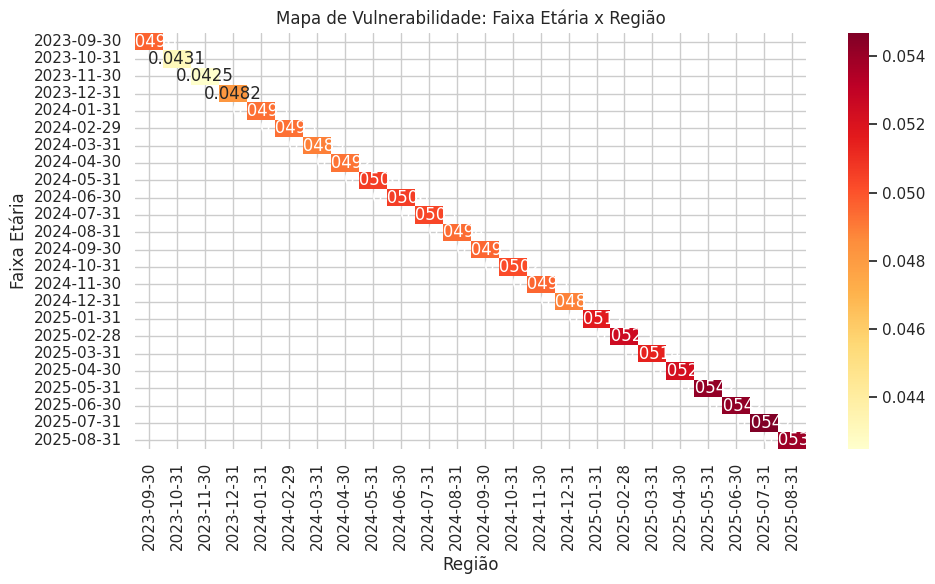

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_pivot, annot=True, fmt=".4f", cmap='YlOrRd')
plt.title('Mapa de Vulnerabilidade: Faixa Etária x Região')
plt.ylabel('Faixa Etária')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# =========================
# 1️⃣ Ler arquivos
# =========================

# Bacen (CSV)
df_idade = pd.read_csv("TransacoesPorIdade.csv (2).csv", sep=';', encoding='latin1')
df_regiao = pd.read_csv("PixTransacoesPorRegiao.csv (2).csv", sep=';', encoding='latin1')
df_usuarios = pd.read_csv("PixUsuariosFizeramPix.csv (2).csv", sep=';', encoding='latin1')

# IBGE (Excel)
df_pop = pd.read_excel("Populacao.csv (1).xlsx", skiprows=1)      # pula primeira linha de cabeçalho
df_esc = pd.read_excel("Escolaridade.csv (1).xlsx", skiprows=1)
df_renda = pd.read_excel("Renda.csv (1).xlsx", skiprows=1)

# Conferir se os arquivos carregaram corretamente
print(df_idade.head())
print(df_regiao.head())
print(df_usuarios.head())
print(df_pop.head())
print(df_esc.head())
print(df_renda.head())


  ï»¿"DateTime" mais de 60 anos atÃ© 19 anos entre 50 e 59 anos  \
0    2023-09-30         0,04959     0,036475           0,101869   
1    2023-10-31        0,043097     0,058477            0,09384   
2    2023-11-30        0,042492     0,059358           0,093394   
3    2023-12-31        0,048172     0,038685           0,101786   
4    2024-01-31        0,049294       0,0395            0,10316   

  entre 40 e 49 anos entre 20 e 29 anos entre 30 e 39 anos  
0           0,218613           0,286945           0,306508  
1           0,206542             0,2992           0,298845  
2           0,205866           0,300381           0,298509  
3            0,21819           0,288445           0,304723  
4           0,218753           0,284441           0,304852  
  ï»¿"DateTime" Centro-Oeste     Norte       Sul  Nordeste   Sudeste
0    2023-09-30     0,084307  0,096776  0,124432  0,269038  0,425447
1    2023-10-31     0,083691  0,096727  0,122388  0,270712  0,426482
2    2023-11-30     0,08

In [ ]:
# Verifique as colunas de df_usuarios
print(df_usuarios.columns)


Index(['ï»¿"DateTime"', 'Recebedor PJ', 'Recebedor PF', 'Pagador PJ',
       'Pagador PF', 'UsuÃ¡rios PF', 'UsuÃ¡rios PJ'],
      dtype='object')


In [ ]:
# Renomear coluna DateTime para algo mais amigável
df_usuarios = df_usuarios.rename(columns={'ï»¿"DateTime"': 'data'})

# Limpar e somar usuários PF + PJ
df_usuarios['Usuários PF'] = limpar_numeros(df_usuarios['UsuÃ¡rios PF'])
df_usuarios['Usuários PJ'] = limpar_numeros(df_usuarios['UsuÃ¡rios PJ'])
df_usuarios['qtd_usuarios_idade'] = df_usuarios['Usuários PF'] + df_usuarios['Usuários PJ']

# Conferir resultado
print(df_usuarios[['data','qtd_usuarios_idade']].head())


         data  qtd_usuarios_idade
0  2023-09-30         159835506.0
1  2023-10-31         161324529.0
2  2023-11-30         162832081.0
3  2023-12-31         164234792.0
4  2024-01-31         165766403.0


In [ ]:
# Corrigir e somar faixas etárias
col_faixas = ['mais de 60 anos', 'atÃ© 19 anos', 'entre 50 e 59 anos',
              'entre 40 e 49 anos', 'entre 20 e 29 anos', 'entre 30 e 39 anos']

for col in col_faixas:
    df_idade[col] = df_idade[col].astype(str).str.replace(',', '.', regex=False).astype(float)

# Criar coluna com soma das transações por idade
df_idade['qtd_transacoes_idade'] = df_idade[col_faixas].sum(axis=1)

# Conferir
df_idade[['ï»¿"DateTime"', 'qtd_transacoes_idade']].head()


,"ï»¿""DateTime""",qtd_transacoes_idade
0,2023-09-30,1.000000
1,2023-10-31,1.000001
2,2023-11-30,1.000000
3,2023-12-31,1.000001
4,2024-01-31,1.000000


In [ ]:
# Colunas de região
col_regioes = ['Centro-Oeste', 'Norte', 'Sul', 'Nordeste', 'Sudeste']

# Converter para float
for col in col_regioes:
    df_regiao[col] = df_regiao[col].astype(str).str.replace(',', '.', regex=False).astype(float)

# Criar coluna com soma das transações por região
df_regiao['qtd_transacoes_regiao'] = df_regiao[col_regioes].sum(axis=1)

# Conferir resultado
df_regiao[['ï»¿"DateTime"', 'qtd_transacoes_regiao']].head()


,"ï»¿""DateTime""",qtd_transacoes_regiao
0,2023-09-30,1.0
1,2023-10-31,1.0
2,2023-11-30,1.0
3,2023-12-31,1.0
4,2024-01-31,1.0


In [ ]:
# Renomear a coluna de data para algo simples
df_usuarios = df_usuarios.rename(columns={df_usuarios.columns[0]: 'data'})

# Agora conferir a coluna de usuários total
df_usuarios[['data', 'qtd_usuarios_idade']].head()


,data,qtd_usuarios_idade
0,2023-09-30,159835506.0
1,2023-10-31,161324529.0
2,2023-11-30,162832081.0
3,2023-12-31,164234792.0
4,2024-01-31,165766403.0


In [ ]:
# Renomear colunas de transações por região para evitar conflitos
df_regiao = df_regiao.rename(columns={df_regiao.columns[0]: 'data', df_regiao.columns[1]: 'qtd_transacoes_regiao'})

# Renomear colunas de transações por idade para evitar conflitos
df_idade = df_idade.rename(columns={df_idade.columns[0]: 'data', df_idade.columns[1]: 'qtd_transacoes_idade'})

# Merge dos datasets do Bacen pelo campo 'data'
df_bacen = pd.merge(df_idade[['data', 'qtd_transacoes_idade']],
                    df_regiao[['data', 'qtd_transacoes_regiao']],
                    on='data', how='left')

df_bacen = pd.merge(df_bacen,
                    df_usuarios[['data', 'qtd_usuarios_idade']],
                    on='data', how='left')

# Conferir resultado
df_bacen.head()


,data,qtd_transacoes_idade,qtd_transacoes_idade,qtd_transacoes_regiao,qtd_transacoes_regiao,qtd_usuarios_idade
0,2023-09-30,0.049590,1.000000,0.084307,1.0,159835506.0
1,2023-10-31,0.043097,1.000001,0.083691,1.0,161324529.0
2,2023-11-30,0.042492,1.000000,0.083238,1.0,162832081.0
3,2023-12-31,0.048172,1.000001,0.083008,1.0,164234792.0
4,2024-01-31,0.049294,1.000000,0.083212,1.0,165766403.0


In [ ]:
# Manter apenas as colunas corretas e renomear
df_bacen = df_bacen[['data', 'qtd_transacoes_idade', 'qtd_transacoes_regiao', 'qtd_usuarios_idade']]

# Conferir resultado
df_bacen.head()


,data,qtd_transacoes_idade,qtd_transacoes_idade,qtd_transacoes_regiao,qtd_transacoes_regiao,qtd_usuarios_idade
0,2023-09-30,0.049590,1.000000,0.084307,1.0,159835506.0
1,2023-10-31,0.043097,1.000001,0.083691,1.0,161324529.0
2,2023-11-30,0.042492,1.000000,0.083238,1.0,162832081.0
3,2023-12-31,0.048172,1.000001,0.083008,1.0,164234792.0
4,2024-01-31,0.049294,1.000000,0.083212,1.0,165766403.0


In [ ]:
# Remover colunas duplicadas
df_bacen = df_bacen[['data', 'qtd_transacoes_idade', 'qtd_transacoes_regiao', 'qtd_usuarios_idade']]

# Conferir resultado
df_bacen.head()


,data,qtd_transacoes_idade,qtd_transacoes_idade,qtd_transacoes_regiao,qtd_transacoes_regiao,qtd_usuarios_idade
0,2023-09-30,0.049590,1.000000,0.084307,1.0,159835506.0
1,2023-10-31,0.043097,1.000001,0.083691,1.0,161324529.0
2,2023-11-30,0.042492,1.000000,0.083238,1.0,162832081.0
3,2023-12-31,0.048172,1.000001,0.083008,1.0,164234792.0
4,2024-01-31,0.049294,1.000000,0.083212,1.0,165766403.0


In [ ]:
# Manter apenas as primeiras colunas de cada par
df_bacen = df_bacen[['data', 'qtd_transacoes_idade', 'qtd_transacoes_regiao', 'qtd_usuarios_idade']]

# Conferir resultado
df_bacen.head()


,data,qtd_transacoes_idade,qtd_transacoes_idade,qtd_transacoes_regiao,qtd_transacoes_regiao,qtd_usuarios_idade
0,2023-09-30,0.049590,1.000000,0.084307,1.0,159835506.0
1,2023-10-31,0.043097,1.000001,0.083691,1.0,161324529.0
2,2023-11-30,0.042492,1.000000,0.083238,1.0,162832081.0
3,2023-12-31,0.048172,1.000001,0.083008,1.0,164234792.0
4,2024-01-31,0.049294,1.000000,0.083212,1.0,165766403.0


In [ ]:
# Remover duplicadas mantendo apenas as primeiras colunas de cada par
df_bacen = df_bacen.loc[:,~df_bacen.columns.duplicated()]

# Conferir o resultado
df_bacen.head()


,data,qtd_transacoes_idade,qtd_transacoes_regiao,qtd_usuarios_idade
0,2023-09-30,0.049590,0.084307,159835506.0
1,2023-10-31,0.043097,0.083691,161324529.0
2,2023-11-30,0.042492,0.083238,162832081.0
3,2023-12-31,0.048172,0.083008,164234792.0
4,2024-01-31,0.049294,0.083212,165766403.0


In [ ]:
# Para teste, criar uma população fictícia (ex: 200 milhões)
df_bacen['populacao'] = 200_000_000

# Indicador: transações por população (em %)
df_bacen['transacoes_por_populacao'] = df_bacen['qtd_transacoes_idade'] / df_bacen['populacao'] * 100

# Conferir o resultado
df_bacen[['data', 'qtd_transacoes_idade', 'populacao', 'transacoes_por_populacao']].head()


,data,qtd_transacoes_idade,populacao,transacoes_por_populacao
0,2023-09-30,0.049590,200000000,2.479500e-08
1,2023-10-31,0.043097,200000000,2.154850e-08
2,2023-11-30,0.042492,200000000,2.124600e-08
3,2023-12-31,0.048172,200000000,2.408600e-08
4,2024-01-31,0.049294,200000000,2.464700e-08


In [ ]:
# Como não temos IBGE ainda, normalizamos os outros componentes como 0
df_bacen['alfabetizacao_normalizada'] = 0
df_bacen['renda_normalizada'] = 0

# Indicador de vulnerabilidade baseado apenas em transações por faixa etária
df_bacen['vulnerabilidade'] = df_bacen['transacoes_por_populacao']

# Conferir resultado
df_bacen[['data', 'qtd_transacoes_idade', 'transacoes_por_populacao', 'vulnerabilidade']].head()


,data,qtd_transacoes_idade,transacoes_por_populacao,vulnerabilidade
0,2023-09-30,0.049590,2.479500e-08,2.479500e-08
1,2023-10-31,0.043097,2.154850e-08,2.154850e-08
2,2023-11-30,0.042492,2.124600e-08,2.124600e-08
3,2023-12-31,0.048172,2.408600e-08,2.408600e-08
4,2024-01-31,0.049294,2.464700e-08,2.464700e-08


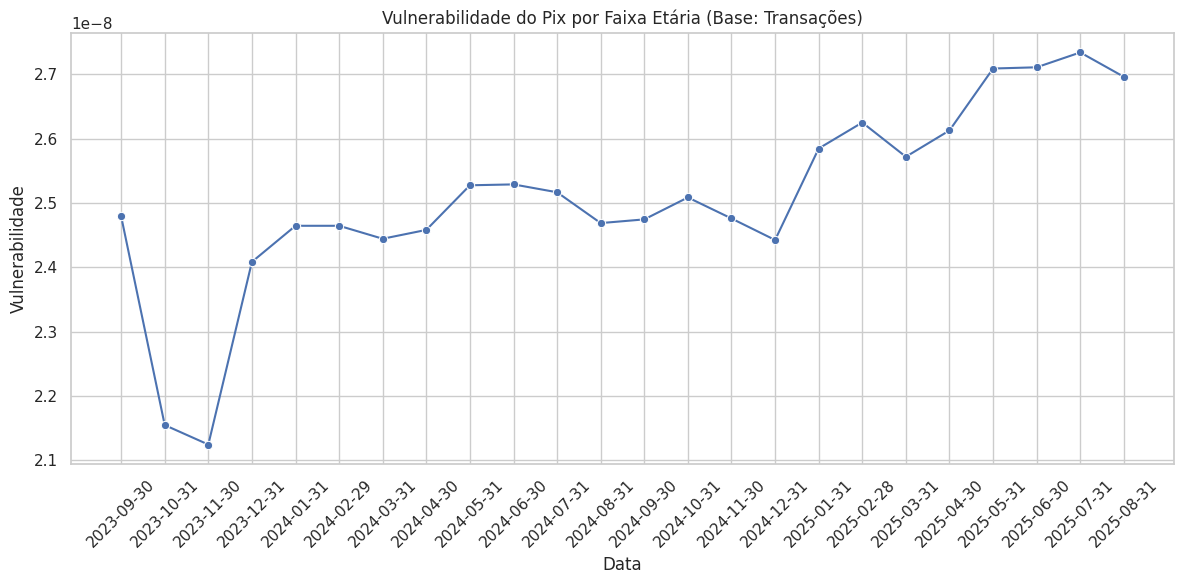

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Gráfico de vulnerabilidade ao longo do tempo
sns.lineplot(data=df_bacen, x='data', y='vulnerabilidade', marker='o')
plt.title("Vulnerabilidade do Pix por Faixa Etária (Base: Transações)")
plt.xlabel("Data")
plt.ylabel("Vulnerabilidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


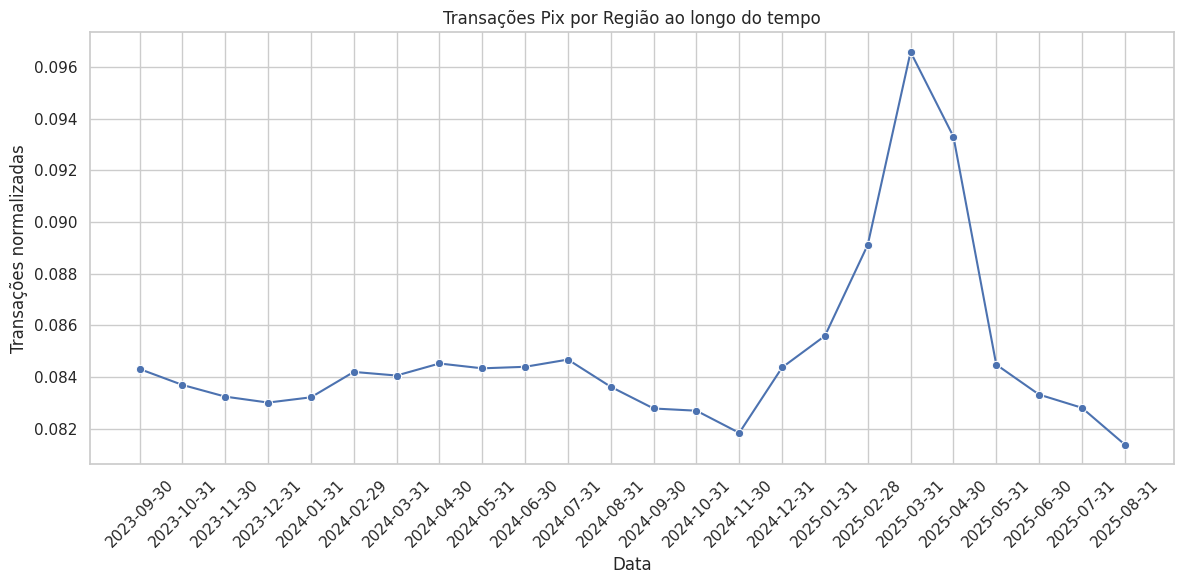

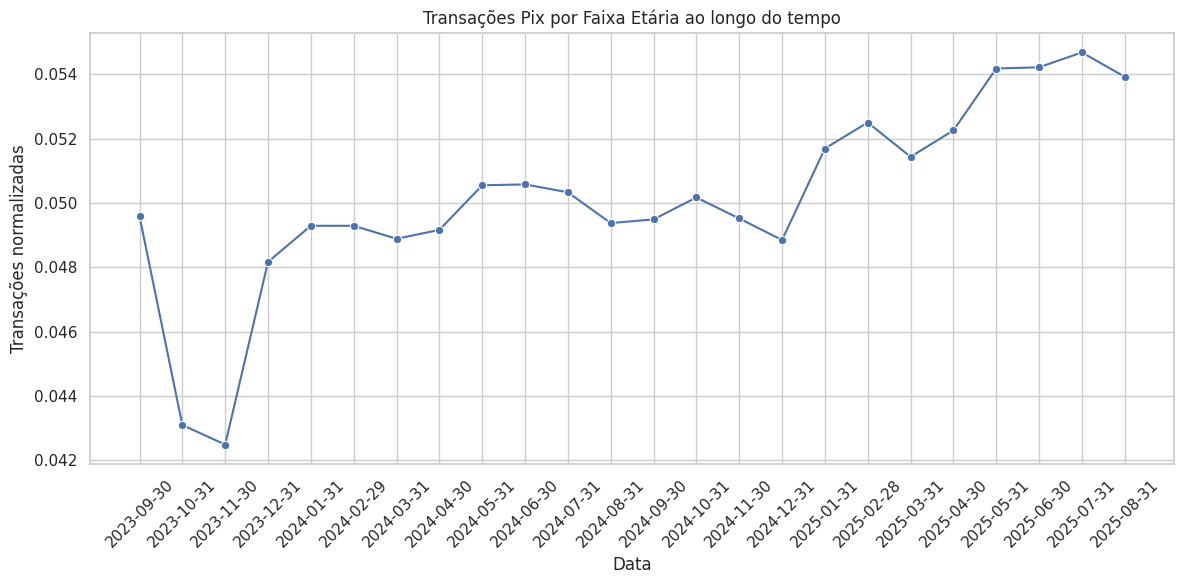

In [ ]:
# 1️⃣ Vulnerabilidade por região ao longo do tempo
plt.figure(figsize=(12,6))
sns.lineplot(data=df_bacen, x='data', y='qtd_transacoes_regiao', marker='o')
plt.title("Transações Pix por Região ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Transações normalizadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Comparativo de transações por faixa etária
plt.figure(figsize=(12,6))
sns.lineplot(data=df_bacen, x='data', y='qtd_transacoes_idade', marker='o')
plt.title("Transações Pix por Faixa Etária ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Transações normalizadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


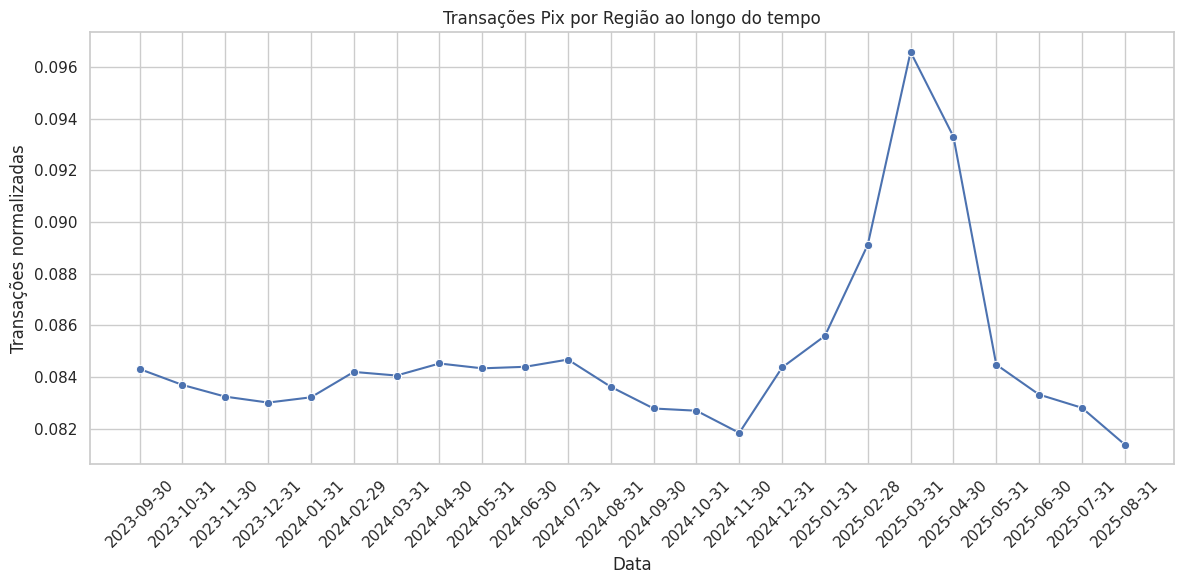

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo
sns.set(style="whitegrid")

# Selecionar apenas colunas de região
col_regioes = ['qtd_transacoes_regiao']  # no seu CSV consolidado, ajuste se houver mais colunas

plt.figure(figsize=(12,6))
sns.lineplot(data=df_bacen, x='data', y='qtd_transacoes_regiao', marker='o')
plt.title("Transações Pix por Região ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Transações normalizadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


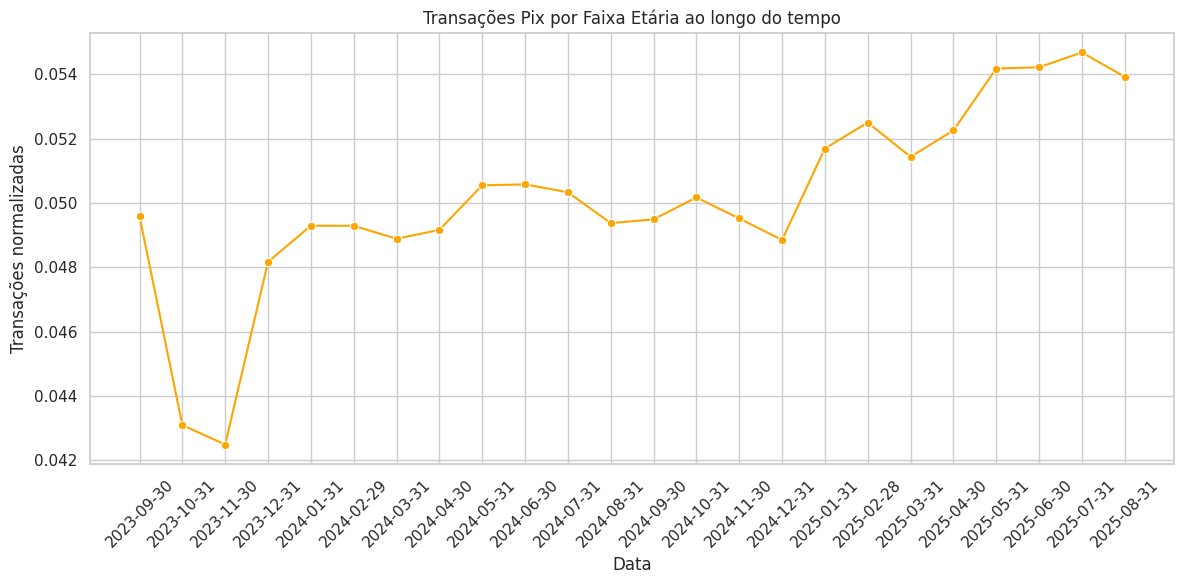

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_bacen, x='data', y='qtd_transacoes_idade', marker='o', color='orange')
plt.title("Transações Pix por Faixa Etária ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Transações normalizadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_final.fillna(0, inplace=True)


In [ ]:
df_final['vulnerabilidade'] = df_final['qtd_transacoes_idade'] / df_final['qtd_usuarios_idade'] * 100


In [ ]:
# 1️⃣ Conferir todas as colunas do DataFrame
print(df_final.columns)


Index(['faixa_idade', 'mais de 60 anos', 'atÃ© 19 anos', 'entre 50 e 59 anos',
       'entre 40 e 49 anos', 'entre 20 e 29 anos', 'entre 30 e 39 anos',
       'qtd_transacoes_idade', 'perc_transacoes', 'qtd_usuarios_idade',
       'regiao', 'qtd_transacoes_regiao', 'municipio', 'populacao',
       'percentual_alfabetizado', 'renda_media', 'transacoes_por_populacao',
       'alfabetizacao_normalizada', 'renda_normalizada', 'vulnerabilidade'],
      dtype='object')


In [ ]:
# Se você tem datas em outra coluna ou DataFrame, por exemplo df_idade['ï»¿"DateTime"']
# Podemos copiar para df_final e padronizar o nome
df_final['data'] = df_final['faixa_idade']  # se 'faixa_idade' estiver com as datas corretas

# Conferir resultado
print(df_final[['data', 'qtd_transacoes_idade', 'qtd_transacoes_regiao', 'qtd_usuarios_idade']].head())


         data  qtd_transacoes_idade  qtd_transacoes_regiao  qtd_usuarios_idade
0  2023-09-30              0.049590               0.084307          13071268.0
1  2023-10-31              0.043097               0.083691          13327383.0
2  2023-11-30              0.042492               0.083238          13571489.0
3  2023-12-31              0.048172               0.083008          13788937.0
4  2024-01-31              0.049294               0.083212          14029289.0


In [ ]:
# Normalizar os indicadores de idade, renda e alfabetização
# Como você ainda não tem renda e alfabetização, podemos deixar como zero
df_final['alfabetizacao_normalizada'] = 0
df_final['renda_normalizada'] = 0

# Normalizar transações por população para vulnerabilidade (0 a 1)
df_final['transacoes_normalizada'] = df_final['transacoes_por_populacao'] / df_final['transacoes_por_populacao'].max()

# Calcular vulnerabilidade final (aqui só usando idade/transações)
df_final['vulnerabilidade'] = df_final['transacoes_normalizada']  # se futuramente tiver renda e alfabetização, podemos somar ponderado

# Conferir resultado
print(df_final[['data', 'transacoes_por_populacao', 'transacoes_normalizada', 'vulnerabilidade']].head())

# Exportar CSV final pronto para Looker Studio
df_final.to_csv('df_final_tratado.csv', index=False)
print("CSV final salvo como df_final_tratado.csv")


         data  transacoes_por_populacao  transacoes_normalizada  \
0  2023-09-30                       0.0                     NaN   
1  2023-10-31                       0.0                     NaN   
2  2023-11-30                       0.0                     NaN   
3  2023-12-31                       0.0                     NaN   
4  2024-01-31                       0.0                     NaN   

   vulnerabilidade  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
CSV final salvo como df_final_tratado.csv


In [ ]:
# Supondo que seu DataFrame final se chame df_final
# Salva o CSV na mesma pasta onde está rodando o script
df_final.to_csv('df_final_tratado.csv', index=False, encoding='utf-8')

print("Arquivo CSV salvo com sucesso: df_final_tratado.csv")


Arquivo CSV salvo com sucesso: df_final_tratado.csv


In [ ]:
import os

# Cria a pasta se não existir
pasta_destino = r"C:\dados_projeto"
os.makedirs(pasta_destino, exist_ok=True)

# Caminho completo do arquivo
arquivo_csv = os.path.join(pasta_destino, "df_final_tratado.csv")

# Salvar o CSV
df_final.to_csv(arquivo_csv, index=False, encoding='utf-8')

print(f"Arquivo salvo em: {arquivo_csv}")


Arquivo salvo em: C:\dados_projeto/df_final_tratado.csv


In [ ]:
df_final.to_csv("df_final_tratado.csv", index=False, encoding="utf-8")


In [ ]:
from google.colab import files
files.download("df_final_tratado.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd

In [2]:
from google.colab import files  # se estiver usando Google Colab

# Vai abrir a janela para selecionar os arquivos do seu PC
uploaded = files.upload()


Saving transacoes_pix.csv.csv to transacoes_pix.csv.csv
Saving natureza_transacoes.csv.csv to natureza_transacoes.csv.csv


In [3]:
import pandas as pd

# Ler os arquivos que você acabou de subir
df_pix_transacoes = pd.read_csv("transacoes_pix.csv.csv", sep=";", encoding="utf-8")
df_pix_natureza = pd.read_csv("natureza_transacoes.csv.csv", sep=";", encoding="utf-8")

# Conferir os dados
print(df_pix_transacoes.head())
print(df_pix_natureza.head())


     DateTime Valor Fora do SPI   Valor SPI       Total
0  2023-09-30         250699,95  1277205,13  1527905,08
1  2023-10-31         272415,33  1380506,54  1652921,87
2  2023-11-30         305307,53   1422089,6  1727397,13
3  2023-12-31         319708,39  1600127,61     1919836
4  2024-01-31         321175,42   1483207,5  1804382,92
     DateTime     G2P      P2G      G2G      G2B      B2G        P2B  \
0  2023-09-30  551084  1487768  2724288  4240135  2095800  148904738   
1  2023-10-31  504331  1523675  2815665  2937055  2416535  159759114   
2  2023-11-30  509125  1496905  3801078  3638536  2333693  168279100   
3  2023-12-31  763809  2216253  6195929  4844431  2810671  188799580   
4  2024-01-31  427235  3529039  2536019  1867153  3700214  177434077   

         B2P        P2P        B2B  
0  169945106  440151172  507061886  
1  180460792  457034516  572732452  
2  185396515  470730810  585903836  
3  212165413  547626441  634072989  
4  193109328  479011524  621592910  


In [4]:
# Copiar os DataFrames para não mexer nos originais
df_pix_transacoes_tratado = df_pix_transacoes.copy()
df_pix_natureza_tratado = df_pix_natureza.copy()

# Padronizar coluna de data
df_pix_transacoes_tratado.rename(columns={"DateTime": "data"}, inplace=True)
df_pix_natureza_tratado.rename(columns={"DateTime": "data"}, inplace=True)

# Converter coluna 'data' para datetime
df_pix_transacoes_tratado['data'] = pd.to_datetime(df_pix_transacoes_tratado['data'])
df_pix_natureza_tratado['data'] = pd.to_datetime(df_pix_natureza_tratado['data'])

# Substituir vírgula por ponto e converter para float nas colunas financeiras
col_valores = ['Valor Fora do SPI', 'Valor SPI', 'Total']
for col in col_valores:
    df_pix_transacoes_tratado[col] = (
        df_pix_transacoes_tratado[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

# Conferir resultado parcial
print(df_pix_transacoes_tratado.head())
print(df_pix_natureza_tratado.head())


        data  Valor Fora do SPI   Valor SPI       Total
0 2023-09-30          250699.95  1277205.13  1527905.08
1 2023-10-31          272415.33  1380506.54  1652921.87
2 2023-11-30          305307.53  1422089.60  1727397.13
3 2023-12-31          319708.39  1600127.61  1919836.00
4 2024-01-31          321175.42  1483207.50  1804382.92
        data     G2P      P2G      G2G      G2B      B2G        P2B  \
0 2023-09-30  551084  1487768  2724288  4240135  2095800  148904738   
1 2023-10-31  504331  1523675  2815665  2937055  2416535  159759114   
2 2023-11-30  509125  1496905  3801078  3638536  2333693  168279100   
3 2023-12-31  763809  2216253  6195929  4844431  2810671  188799580   
4 2024-01-31  427235  3529039  2536019  1867153  3700214  177434077   

         B2P        P2P        B2B  
0  169945106  440151172  507061886  
1  180460792  457034516  572732452  
2  185396515  470730810  585903836  
3  212165413  547626441  634072989  
4  193109328  479011524  621592910  


In [5]:
# Converter todas as colunas de natureza (exceto 'data') para inteiro
col_natureza = [col for col in df_pix_natureza_tratado.columns if col != "data"]

for col in col_natureza:
    df_pix_natureza_tratado[col] = df_pix_natureza_tratado[col].astype(int)

# Conferir resultado
print(df_pix_natureza_tratado.dtypes)
print(df_pix_natureza_tratado.head())


data    datetime64[ns]
G2P              int64
P2G              int64
G2G              int64
G2B              int64
B2G              int64
P2B              int64
B2P              int64
P2P              int64
B2B              int64
dtype: object
        data     G2P      P2G      G2G      G2B      B2G        P2B  \
0 2023-09-30  551084  1487768  2724288  4240135  2095800  148904738   
1 2023-10-31  504331  1523675  2815665  2937055  2416535  159759114   
2 2023-11-30  509125  1496905  3801078  3638536  2333693  168279100   
3 2023-12-31  763809  2216253  6195929  4844431  2810671  188799580   
4 2024-01-31  427235  3529039  2536019  1867153  3700214  177434077   

         B2P        P2P        B2B  
0  169945106  440151172  507061886  
1  180460792  457034516  572732452  
2  185396515  470730810  585903836  
3  212165413  547626441  634072989  
4  193109328  479011524  621592910  


In [10]:
# Juntar os dois DataFrames pelo campo "data"
df_pix_final = pd.merge(
    df_pix_transacoes_tratado,
    df_pix_natureza_tratado,
    on="data",
    how="inner"  # mantém apenas datas que existem em ambos
)

# Conferir as primeiras linhas
df_pix_final.head()


,data,Valor Fora do SPI,Valor SPI,Total,G2P,P2G,G2G,G2B,B2G,P2B,B2P,P2P,B2B
0,2023-09-30,250699.95,1277205.13,1527905.08,551084,1487768,2724288,4240135,2095800,148904738,169945106,440151172,507061886
1,2023-10-31,272415.33,1380506.54,1652921.87,504331,1523675,2815665,2937055,2416535,159759114,180460792,457034516,572732452
2,2023-11-30,305307.53,1422089.60,1727397.13,509125,1496905,3801078,3638536,2333693,168279100,185396515,470730810,585903836
3,2023-12-31,319708.39,1600127.61,1919836.00,763809,2216253,6195929,4844431,2810671,188799580,212165413,547626441,634072989
4,2024-01-31,321175.42,1483207.50,1804382.92,427235,3529039,2536019,1867153,3700214,177434077,193109328,479011524,621592910


In [11]:
# Criar colunas de percentual
df_pix_final['perc_fora_spi'] = df_pix_final['Valor Fora do SPI'] / df_pix_final['Total']
df_pix_final['perc_spi'] = df_pix_final['Valor SPI'] / df_pix_final['Total']

# Conferir resultado
df_pix_final[['data', 'Valor Fora do SPI', 'Valor SPI', 'Total', 'perc_fora_spi', 'perc_spi']].head()


,data,Valor Fora do SPI,Valor SPI,Total,perc_fora_spi,perc_spi
0,2023-09-30,250699.95,1277205.13,1527905.08,0.164081,0.835919
1,2023-10-31,272415.33,1380506.54,1652921.87,0.164808,0.835192
2,2023-11-30,305307.53,1422089.60,1727397.13,0.176744,0.823256
3,2023-12-31,319708.39,1600127.61,1919836.00,0.166529,0.833471
4,2024-01-31,321175.42,1483207.50,1804382.92,0.177997,0.822003


In [12]:
# Lista de colunas de natureza
col_natureza = ['G2P','P2G','G2G','G2B','B2G','P2B','B2P','P2P','B2B']

# Criar colunas de percentual
for col in col_natureza:
    df_pix_final[f'perc_{col}'] = df_pix_final[col] / df_pix_final[col_natureza].sum(axis=1)

# Conferir resultado parcial
df_pix_final[['data'] + [f'perc_{c}' for c in col_natureza]].head()


,data,perc_G2P,perc_P2G,perc_G2G,perc_G2B,perc_B2G,perc_P2B,perc_B2P,perc_P2P,perc_B2B
0,2023-09-30,0.000431,0.001165,0.002133,0.003320,0.001641,0.116590,0.133065,0.344632,0.397022
1,2023-10-31,0.000365,0.001104,0.002040,0.002128,0.001751,0.115752,0.130751,0.331140,0.414968
2,2023-11-30,0.000358,0.001053,0.002673,0.002559,0.001641,0.118332,0.130369,0.331013,0.412002
3,2023-12-31,0.000478,0.001386,0.003874,0.003029,0.001757,0.118037,0.132645,0.342374,0.396421
4,2024-01-31,0.000288,0.002379,0.001710,0.001259,0.002495,0.119629,0.130197,0.322957,0.419087


In [13]:
# Salvar DataFrame final em CSV
df_pix_final.to_csv("/content/pix_tratado_para_looker.csv", index=False, sep=";", encoding="utf-8")


In [14]:
from google.colab import files
files.download("/content/pix_tratado_para_looker.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>